<a href="https://colab.research.google.com/github/pagand/NRC/blob/main/Prepration/NRC_Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Fuel consumption

> Data prepration



## 1. Data preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

# import the feature engineered dataset
df = pd.read_csv('/content/drive/MyDrive/queenCsvOutAugmented.csv', index_col=None, skiprows=[1])
# df = df.fillna(0)
print(df)

                  Dati  Time         CARGO  CARGO_PAX   DEPTH  \
0        190830_000100   1.0  1.000000e+09        1.0  0.0050   
1        190830_000200   2.0  1.000000e+09        1.0  0.0050   
2        190830_000300   3.0  1.000000e+09        1.0  0.0050   
3        190830_000400   4.0  1.000000e+09        1.0  0.0051   
4        190830_000500   5.0  1.000000e+09        1.0  0.0084   
...                ...   ...           ...        ...     ...   
1098848  210930_225300   NaN           NaN        NaN     NaN   
1098849  210930_225400   NaN           NaN        NaN     NaN   
1098850  210930_225500   NaN           NaN        NaN     NaN   
1098851  210930_225600   NaN           NaN        NaN     NaN   
1098852  210930_225700   NaN           NaN        NaN     NaN   

         ENGINE_1_FLOWRATE  ENGINE_1_FLOWRATEA  ENGINE_1_FLOWRATEB  \
0                -196.1073           2875.3389           2679.2317   
1                -188.3371           2911.7334           2723.3962   
2        

We retrieved a total of over 1 million data points.

In [ ]:
df.columns

Index(['Dati', 'Time', 'CARGO', 'CARGO_PAX', 'DEPTH', 'ENGINE_1_FLOWRATE',
       'ENGINE_1_FLOWRATEA', 'ENGINE_1_FLOWRATEB', 'ENGINE_1_FLOWTEMPA',
       'ENGINE_1_FLOWTEMPB', 'ENGINE_1_FUEL_CONSUMPTION', 'ENGINE_2_FLOWRATE',
       'ENGINE_2_FLOWRATEA', 'ENGINE_2_FLOWRATEB', 'ENGINE_2_FLOWTEMPA',
       'ENGINE_2_FLOWTEMPB', 'ENGINE_2_FUEL_CONSUMPTION', 'HEADING',
       'LATITUDE', 'LONGITUDE', 'PAX', 'PITCH_1', 'PITCH_2', 'POWER_1',
       'POWER_2', 'RATE_OF_TURN', 'SOG', 'SOG_SPEEDLOG_LONG',
       'SOG_SPEEDLOG_TRANS', 'SPEED_1', 'SPEED_2', 'STW', 'THRUST_1',
       'THRUST_2', 'TORQUE_1', 'TORQUE_2', 'TRACK_MADE_GOOD', 'WIND_ANGLE',
       'WIND_SPEED', 'WIND_ANGLE_TRUE', 'WIND_SPEED_TRUE', 'Mode1', 'Trip'],
      dtype='object')

In [ ]:
# Transactions between 2016 and 2019
#df = df[(df['Transaction year'] < '2020') & (df['Transaction year'] > '2015')]

Drop all the columns we don't need.

In [ ]:
df = df.drop(columns={'Time','PAX','CARGO_PAX','ENGINE_1_FLOWRATEB', 'ENGINE_1_FLOWTEMPB','ENGINE_2_FLOWRATEB','ENGINE_2_FLOWTEMPB','CARGO'})

In [ ]:
df.shape

(1098853, 35)

Identify any null value

In [ ]:
df.isna().sum()

Dati                              0
DEPTH                        262909
ENGINE_1_FLOWRATE            262909
ENGINE_1_FLOWRATEA           262909
ENGINE_1_FLOWTEMPA           262909
ENGINE_1_FUEL_CONSUMPTION    262909
ENGINE_2_FLOWRATE            262909
ENGINE_2_FLOWRATEA           262909
ENGINE_2_FLOWTEMPA           262909
ENGINE_2_FUEL_CONSUMPTION    262909
HEADING                      262909
LATITUDE                     311548
LONGITUDE                    311539
PITCH_1                      275467
PITCH_2                      275467
POWER_1                      262909
POWER_2                      262909
RATE_OF_TURN                 275467
SOG                          262909
SOG_SPEEDLOG_LONG            262909
SOG_SPEEDLOG_TRANS           262909
SPEED_1                      262909
SPEED_2                      262909
STW                          262909
THRUST_1                     262909
THRUST_2                     262909
TORQUE_1                     262909
TORQUE_2                    

### Impute missing data

We will impute the missing data with the most common one.

In [ ]:
df['LONGITUDE'].value_counts().head()
df['LATITUDE'].value_counts().head()
df['WIND_ANGLE_TRUE'].value_counts().head()
df['WIND_SPEED_TRUE'].value_counts().head()

1.0633    160
1.5017    159
1.2817    157
1.2217    157
1.8100    156
Name: WIND_SPEED_TRUE, dtype: int64

Apartments located on the 2nd floor are the most common.

Impute 2 to the missing values. 

In [ ]:
df['LONGITUDE'] = df['LONGITUDE'].fillna(-123.27151 )
df['LATITUDE'] = df['LATITUDE'].fillna(49.3771)
df['WIND_ANGLE_TRUE'] = df['WIND_ANGLE_TRUE'].fillna(34.8)
df['WIND_SPEED_TRUE'] = df['WIND_SPEED_TRUE'].fillna(1.0633)
df = df.fillna(0)

### Remove outliers

In [ ]:
# choosing HN
#df = df[df["Trip"] == 1]
# drop the fuel consumption zero
df.describe()

,DEPTH,ENGINE_1_FLOWRATE,ENGINE_1_FLOWRATEA,ENGINE_1_FLOWTEMPA,ENGINE_1_FUEL_CONSUMPTION,ENGINE_2_FLOWRATE,ENGINE_2_FLOWRATEA,ENGINE_2_FLOWTEMPA,ENGINE_2_FUEL_CONSUMPTION,HEADING,...,THRUST_2,TORQUE_1,TORQUE_2,TRACK_MADE_GOOD,WIND_ANGLE,WIND_SPEED,WIND_ANGLE_TRUE,WIND_SPEED_TRUE,Mode1,Trip
count,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,...,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06,1.098853e+06
mean,3.637230e-02,-2.453751e+02,1.256194e+03,1.924395e+01,2.140654e+02,-2.741245e+02,7.131971e+02,1.898040e+01,2.376400e+02,8.909150e+01,...,6.222436e+01,6.754817e+01,4.011101e+01,8.422158e+01,1.056974e+02,7.512768e+00,1.885649e+01,9.831715e+00,6.019276e-02,9.016220e-02
std,6.231481e-02,3.214044e+02,1.299367e+03,1.191029e+01,2.791447e+02,3.355051e+02,7.488985e+02,1.178061e+01,2.903338e+02,1.135852e+02,...,1.453012e+02,1.205084e+02,1.022846e+02,1.026417e+02,1.241056e+02,9.380587e+00,4.452822e+01,1.357059e+01,4.484261e-01,6.056937e-01
min,0.000000e+00,-1.142971e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.050410e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-3.827733e+02,-3.817200e+00,-5.520900e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e+01,0.000000e+00,-1.000000e+00,-1.000000e+00
25%,0.000000e+00,-5.723538e+02,0.000000e+00,0.000000e+00,0.000000e+00,-6.167615e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.515000e+00,1.063300e+00,0.000000e+00,0.000000e+00
50%,5.000000e-03,0.000000e+00,0.000000e+00,2.330000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.275000e+01,0.000000e+00,5.600000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,2.996700e+00,3.480000e+01,2.855000e+00,0.000000e+00,0.000000e+00
75%,2.980000e-02,0.000000e+00,2.532998e+03,2.827670e+01,4.989663e+02,0.000000e+00,1.493105e+03,2.799330e+01,5.347830e+02,2.326000e+02,...,1.474690e+01,6.520980e+01,0.000000e+00,1.873400e+02,1.980000e+02,1.333000e+01,4.032420e+01,1.101190e+01,0.000000e+00,0.000000e+00
max,3.231000e-01,4.574403e+02,5.872139e+03,3.845330e+01,9.213630e+02,3.488119e+02,2.094227e+03,3.808330e+01,9.725976e+02,3.599000e+02,...,6.107682e+02,4.336642e+02,4.356886e+02,3.589317e+02,3.660000e+02,7.318430e+01,9.000000e+01,8.381460e+01,1.000000e+00,1.000000e+00


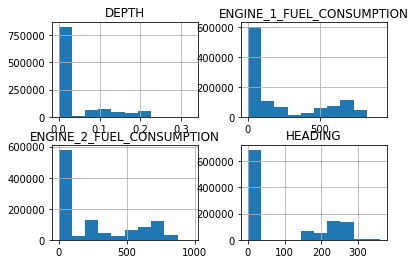

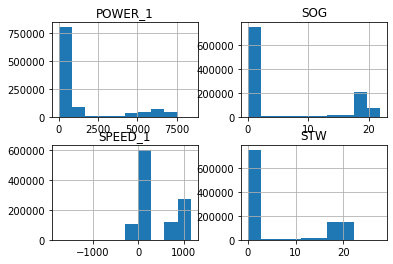

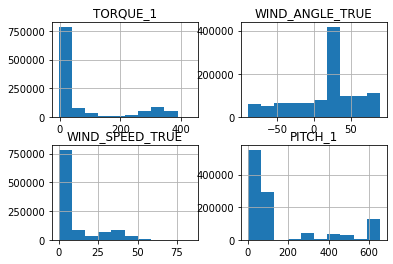

In [ ]:
df1 = df[['DEPTH','ENGINE_1_FUEL_CONSUMPTION','ENGINE_2_FUEL_CONSUMPTION','HEADING']]
df1.hist()
df1 = df[['POWER_1','SOG', 'SPEED_1','STW']]
df1.hist()
df1 = df[['TORQUE_1','WIND_ANGLE_TRUE','WIND_SPEED_TRUE','PITCH_1']]
df1.hist()


df = df.drop(df[(df['LONGITUDE'] >=-123.2715)].index)
df = df.drop(df[(df['LONGITUDE'] <= -123.9554) ].index)
df = df.drop(df[(abs(df['SPEED_1'])<10) & (abs(df['SPEED_2'] )<10)  ].index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe13b576690>,
      dtype=object)

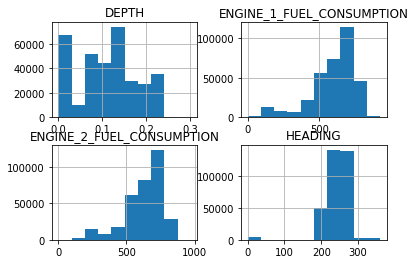

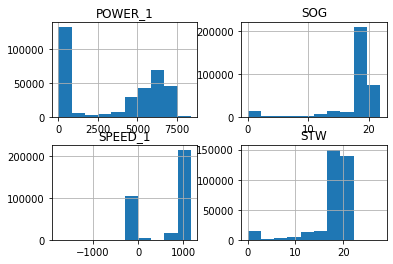

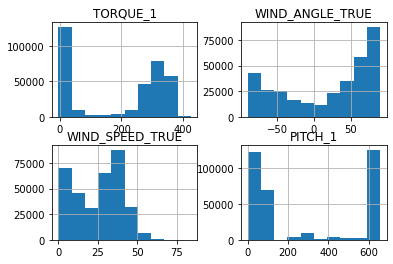

In [ ]:
df1 = df[['DEPTH','ENGINE_1_FUEL_CONSUMPTION','ENGINE_2_FUEL_CONSUMPTION','HEADING']]
df1.hist()
df1 = df[['POWER_1','SOG', 'SPEED_1','STW']]
df1.hist()
df1 = df[['TORQUE_1','WIND_ANGLE_TRUE','WIND_SPEED_TRUE','PITCH_1']]
df1.hist()

We can spot wrong values for FCR, and extreme values for speed.

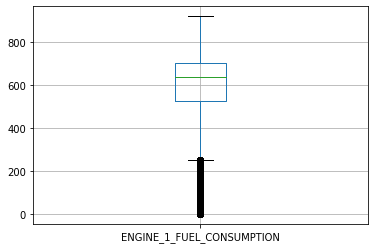

In [ ]:
df.boxplot(column = ['ENGINE_1_FUEL_CONSUMPTION'])

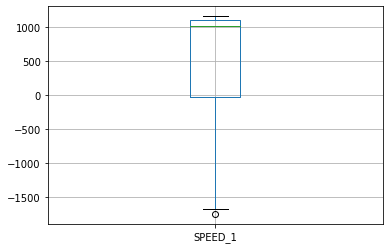

In [ ]:
df.boxplot(column = ['SPEED_1'])

We will use the 1.5 * IQR rule to remove outliers.

In [ ]:
# Function to compute the lower range and upper range of values to keep (1.5 x IQR)
def range_keep(column):
    sorted(column)
    Q1,Q3 = np.percentile(column , [25,75]) # 25th to 75th percentile (interquartile range)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [ ]:
df.shape

(340358, 35)

In [ ]:
# Compute the lower range and upper range for column 'SPEED_1'
lower_range, upper_range = range_keep(df['SPEED_1'])
print(lower_range, upper_range)
df = df.drop(df[(df['SPEED_1'] > upper_range) | (df['SPEED_1'] < lower_range)].index)

lower_range, upper_range = range_keep(df['SPEED_2'])
print(lower_range, upper_range)
df = df.drop(df[(df['SPEED_2'] > upper_range) | (df['SPEED_2'] < lower_range)].index)

# Compute the lower range and upper range for column 'ENGINE_1_FUEL_CONSUMPTION'
lower_range, upper_range = range_keep(df['ENGINE_1_FUEL_CONSUMPTION'])
print(lower_range, upper_range)
df = df.drop(df[(df['ENGINE_1_FUEL_CONSUMPTION'] > upper_range) | (df['ENGINE_1_FUEL_CONSUMPTION'] < lower_range)].index)

lower_range, upper_range = range_keep(df['ENGINE_2_FUEL_CONSUMPTION'])
print(lower_range, upper_range)
df = df.drop(df[(df['ENGINE_2_FUEL_CONSUMPTION'] > upper_range) | (df['ENGINE_2_FUEL_CONSUMPTION'] < lower_range)].index)

-1729.4823125 2812.4179875
-1613.6717999999996 2612.6305999999995
252.97739999999988 977.5998000000001
337.6405500000001 978.9673499999999


In [ ]:

df.shape

(317235, 35)

Lower ranges are all negative, which mean we didn't remove any unusually low floor area

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe13c47ce10>,
      dtype=object)

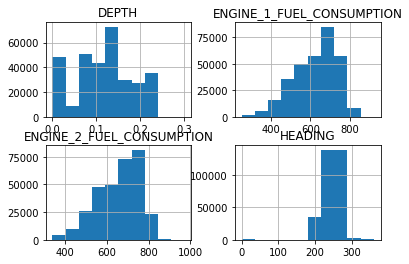

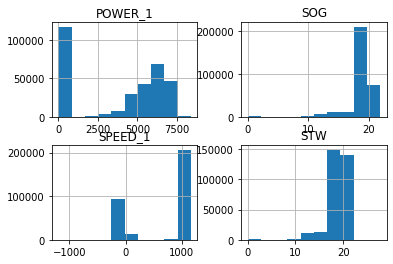

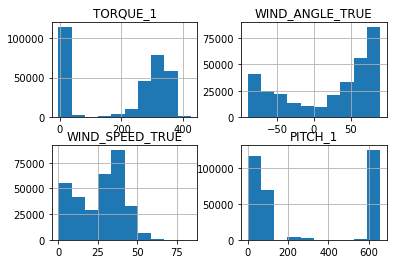

In [ ]:
df1 = df[['DEPTH','ENGINE_1_FUEL_CONSUMPTION','ENGINE_2_FUEL_CONSUMPTION','HEADING']]
df1.hist()
df1 = df[['POWER_1','SOG', 'SPEED_1','STW']]
df1.hist()
df1 = df[['TORQUE_1','WIND_ANGLE_TRUE','WIND_SPEED_TRUE','PITCH_1']]
df1.hist()

Histograms look much more "balanced" now.

### Look for correlations between features

Compute the standard correlation coefficient between every pair of attributes.

In [ ]:
df.corr()

,DEPTH,ENGINE_1_FLOWRATE,ENGINE_1_FLOWRATEA,ENGINE_1_FLOWTEMPA,ENGINE_1_FUEL_CONSUMPTION,ENGINE_2_FLOWRATE,ENGINE_2_FLOWRATEA,ENGINE_2_FLOWTEMPA,ENGINE_2_FUEL_CONSUMPTION,HEADING,...,THRUST_2,TORQUE_1,TORQUE_2,TRACK_MADE_GOOD,WIND_ANGLE,WIND_SPEED,WIND_ANGLE_TRUE,WIND_SPEED_TRUE,Mode1,Trip
DEPTH,1.000000,-0.124582,-0.084894,0.035229,0.125770,-0.128955,0.127148,0.035479,0.129840,0.122127,...,0.042492,0.004064,0.056013,0.002857,0.020371,0.093198,-0.049822,0.055313,0.001139,-0.013340
ENGINE_1_FLOWRATE,-0.124582,1.000000,0.485859,-0.060624,-0.999252,0.954424,-0.800289,-0.060753,-0.956401,-0.028794,...,-0.235404,-0.032128,-0.251319,-0.166656,0.061142,-0.315681,0.066562,-0.029636,0.101929,0.108984
ENGINE_1_FLOWRATEA,-0.084894,0.485859,1.000000,-0.081847,-0.481002,0.516994,-0.775791,-0.081431,-0.517348,-0.023223,...,-0.166527,0.029916,-0.171478,-0.004618,0.000855,-0.165457,0.054809,0.032199,0.083909,0.082207
ENGINE_1_FLOWTEMPA,0.035229,-0.060624,-0.081847,1.000000,0.041079,-0.196319,0.152051,0.999898,0.175195,-0.007285,...,0.061595,-0.021967,0.050030,-0.175315,0.029907,-0.072526,-0.009701,-0.102427,-0.037380,-0.034776
ENGINE_1_FUEL_CONSUMPTION,0.125770,-0.999252,-0.481002,0.041079,1.000000,-0.950710,0.796108,0.041215,0.954277,0.029782,...,0.232612,0.034048,0.248740,0.170445,-0.061553,0.317088,-0.065840,0.032916,-0.099455,-0.106691
ENGINE_2_FLOWRATE,-0.128955,0.954424,0.516994,-0.196319,-0.950710,1.000000,-0.856932,-0.196768,-0.999118,-0.021690,...,-0.231782,-0.030098,-0.249807,-0.081847,0.054630,-0.306010,0.067008,-0.022690,0.102197,0.106171
ENGINE_2_FLOWRATEA,0.127148,-0.800289,-0.775791,0.152051,0.796108,-0.856932,1.000000,0.152354,0.857358,0.021983,...,0.233615,-0.010937,0.246095,0.035187,-0.031454,0.280627,-0.075377,-0.005716,-0.111475,-0.112831
ENGINE_2_FLOWTEMPA,0.035479,-0.060753,-0.081431,0.999898,0.041215,-0.196768,0.152354,1.000000,0.175635,-0.006860,...,0.068332,-0.028941,0.056863,-0.171034,0.030624,-0.071151,-0.013049,-0.108396,-0.043398,-0.040789
ENGINE_2_FUEL_CONSUMPTION,0.129840,-0.956401,-0.517348,0.175195,0.954277,-0.999118,0.857358,0.175635,1.000000,0.022290,...,0.229543,0.032267,0.247870,0.085164,-0.055020,0.308207,-0.066271,0.026181,-0.099841,-0.103937
HEADING,0.122127,-0.028794,-0.023223,-0.007285,0.029782,-0.021690,0.021983,-0.006860,0.022290,1.000000,...,0.033721,-0.017572,0.028690,0.099784,0.044605,0.099006,-0.097707,0.073216,0.003615,-0.031785


Now check how much each feature correlates with the target.

In [ ]:
df.corr()['ENGINE_1_FUEL_CONSUMPTION'].sort_values(ascending = False)

ENGINE_1_FUEL_CONSUMPTION    1.000000
ENGINE_2_FUEL_CONSUMPTION    0.954277
ENGINE_2_FLOWRATEA           0.796108
STW                          0.592002
SOG                          0.560761
WIND_SPEED                   0.317088
POWER_2                      0.276376
TORQUE_2                     0.248740
THRUST_2                     0.232612
TRACK_MADE_GOOD              0.170445
PITCH_2                      0.158707
SPEED_2                      0.129511
DEPTH                        0.125770
SOG_SPEEDLOG_LONG            0.107960
POWER_1                      0.076846
LATITUDE                     0.055585
LONGITUDE                    0.052502
ENGINE_2_FLOWTEMPA           0.041215
ENGINE_1_FLOWTEMPA           0.041079
TORQUE_1                     0.034048
WIND_SPEED_TRUE              0.032916
HEADING                      0.029782
THRUST_1                     0.009558
PITCH_1                     -0.015722
SOG_SPEEDLOG_TRANS          -0.055072
WIND_ANGLE                  -0.061553
WIND_ANGLE_T

As we could expect, the amount of FC is highly correlated with ENGINE_1_FLOWRATE, POWER_1, THRUST_1, SPEED_1 . Let's visualize this relation on a graph.

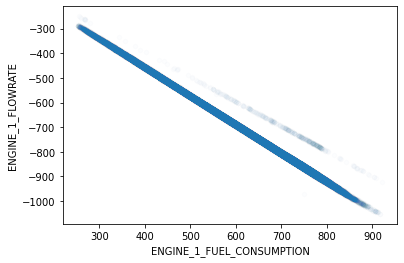

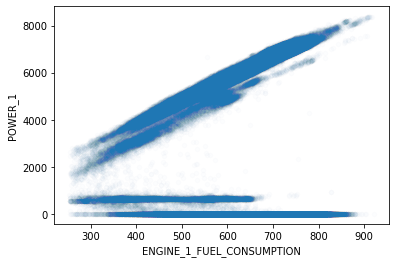

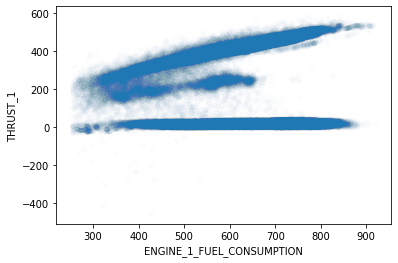

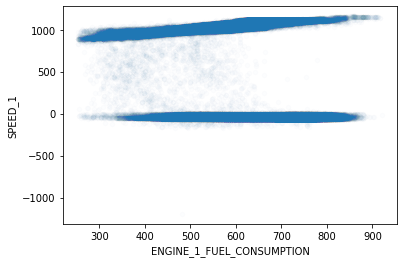

In [ ]:
df.plot.scatter('ENGINE_1_FUEL_CONSUMPTION', 'ENGINE_1_FLOWRATE', alpha = 0.01)
df.plot.scatter('ENGINE_1_FUEL_CONSUMPTION', 'POWER_1', alpha = 0.01)
df.plot.scatter('ENGINE_1_FUEL_CONSUMPTION', 'THRUST_1', alpha = 0.01)
df.plot.scatter('ENGINE_1_FUEL_CONSUMPTION', 'SPEED_1', alpha = 0.01)


We can see a general upward trend.

Let's plot every numerical attribute against others.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef3ad2c910>,
      dtype=object)

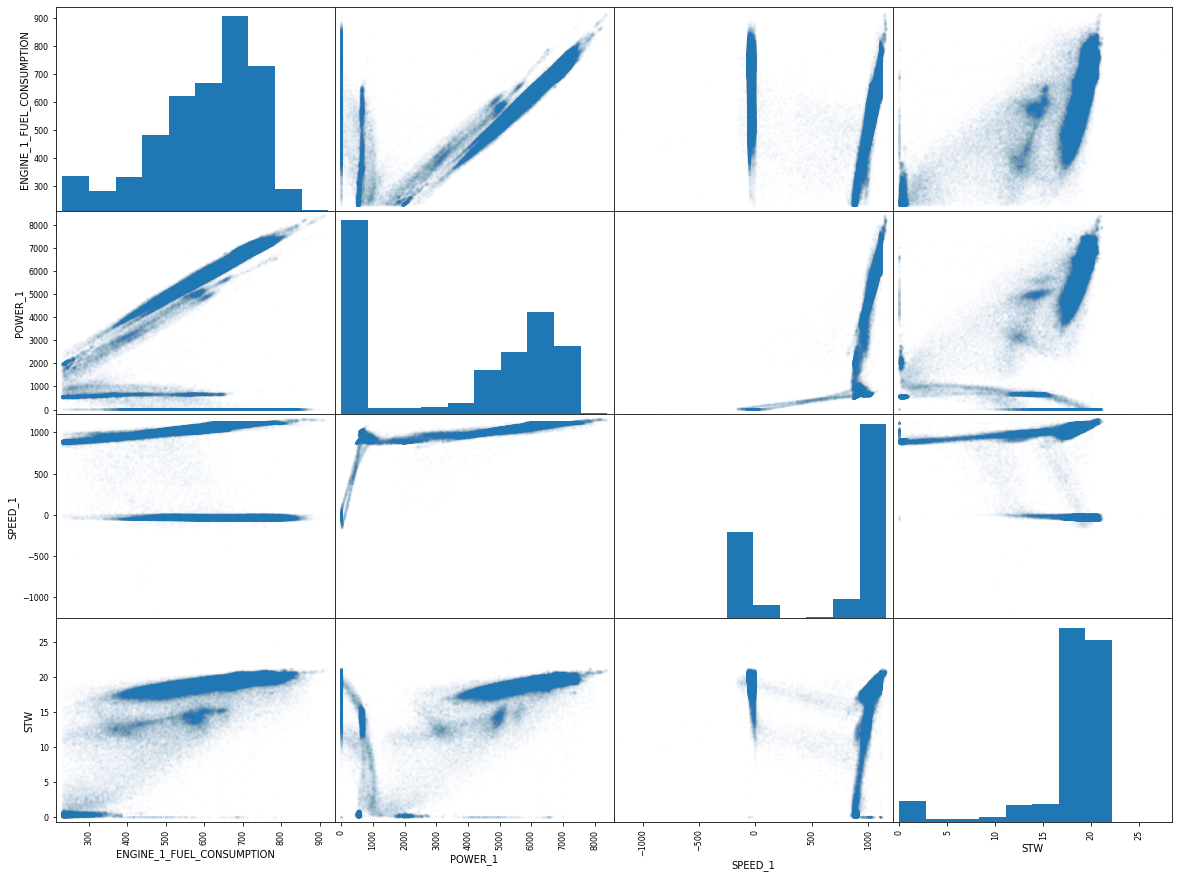

In [ ]:
df1 = df[['ENGINE_1_FUEL_CONSUMPTION','POWER_1','SPEED_1','STW']]

pd.plotting.scatter_matrix(df1, figsize =(20,15), alpha = 0.01)

### Save the dataframe to a file

In [ ]:
# Save the data frame to a file
df.to_pickle('df_dummy.pkl')
!cp "/content/df_dummy.pkl" "/content/drive/MyDrive/"